In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_cardio.csv")

In [3]:
df.head(6)

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bpc
0,3,2,1,1,0,0,1,0,1,1
1,4,1,3,1,0,0,1,1,4,4
2,4,1,3,1,0,0,0,1,1,3
3,3,2,1,1,0,0,1,1,3,4
4,3,1,1,1,0,0,0,0,1,1
5,4,1,2,2,0,0,0,0,3,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x = df[['gender','gluc','smoke','bmi','bpc','cholesterol','alco','active']]
y = df[['cardio']]

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
clfer = svm.SVC()
clfer.fit(X_train,y_train)

C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred = clfer.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100
print(confusion_matrix(y_test, y_pred))

[[8714 2792]
 [3584 8010]]


In [9]:
import xgboost as xgb

In [10]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=50)

In [11]:
xgb_model.fit(X_train,y_train)

C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=50, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [12]:
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

72.45021645021646
[[8880 2626]
 [3738 7856]]


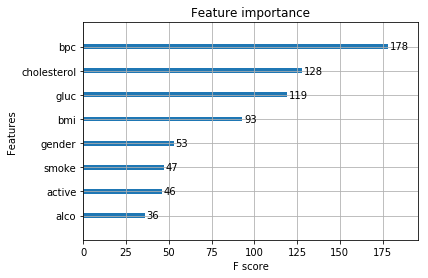

In [13]:
xgb.plot_importance(xgb_model)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg = LogisticRegression(dual=True)
reg.fit(X_train,y_train)

C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

72.0909090909091
[[8756 2750]
 [3697 7897]]


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
t_clf = DecisionTreeClassifier()
t_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = t_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

71.78354978354979
[[9022 2484]
 [4034 7560]]


In [20]:
print(reg.score(x,y))
t_clf.score(x,y)

0.7183142857142857


0.7229571428571429

In [21]:
# y.describe()

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu', solver='adam', max_iter=100)

In [24]:
mlp.fit(X_train,y_train)

C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YEDHU KRISHNAN\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)

72.37229437229438


In [26]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.73     11506\n           1       0.75      0.68      0.71     11594\n\n   micro avg       0.72      0.72      0.72     23100\n   macro avg       0.73      0.72      0.72     23100\nweighted avg       0.73      0.72      0.72     23100\n'

In [27]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.73     11506\n           1       0.75      0.68      0.71     11594\n\n   micro avg       0.72      0.72      0.72     23100\n   macro avg       0.73      0.72      0.72     23100\nweighted avg       0.73      0.72      0.72     23100\n'